In [1]:
#main goal is to look at every part of the image and try to find the total number of apple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import matplotlib.pyplot as plt

**Import and test 1 image**

---

In [10]:
path_image = '.../detection/test/images/'
   
    #open image
image_name = path_image + 'dataset1_back_1' + '.png'
image_abs = Image.open(image_name)

    #resize image
new_image = image_abs.resize((736, 1280))
    #conv array
array_image = img_to_array(new_image)
    #extend array
array_image = np.expand_dims(array_image, axis=0)

print(array_image.shape)

(1, 1280, 736, 3)


Split image in smaller one

In [11]:
#create multiples images 
val_images = np.full((920,32,32,3), 0)

k=0

im = new_image
for i in range(0,1248,32):
    for j in range(0,704,32):
        box = (j, i, j+32, i+32)
        a = im.crop(box)
        #o = a.crop(area)
        val_images[k,:,:] = a
        k = k + 1


In [12]:
#resize to 0-1
val_images = val_images / 255.0

print(val_images.shape)

(920, 32, 32, 3)


In [13]:
print(val_images[0,:,:,:].shape)

(32, 32, 3)


number of apple
[373]


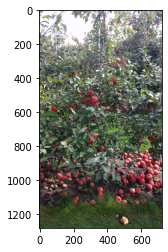

In [14]:
from keras.models import load_model

model = load_model('R1_version_2.h5')

number_apple = 0

for i in range(0,919):
        
    image_i = val_images[i,:,:,:]
    
    image_i = np.expand_dims(image_i, axis=0)
    
    nb_local = model.predict_classes(image_i)
    
    number_apple = number_apple + nb_local
    
plt.imshow(image_abs)
print("number of apple")
print(number_apple)
    